## Linear Supervised Learning Series

# Part 3: The perceptron

In this post we discuss the *perceptron* - a historically significant and useful way of thinking about linear classification.  The derivation of the perceptron is more direct to the task of classification than is logistic regression, provoking both the use of the *rectified linear unit* function which plays such an important role with neural networks, as well as shedding light on the origin of the *softmax cost function*.  However as we will see the perceptron mindset - combined with our ever-present need for well structured cost functions that we can easily minimize - naturally leads us back to the *softmax cost function* employed by logistic regression.  This shows us that while they are born from different perspectives - in the end - the perceptron and logistic regression are not so different after all.

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import superlearn_library as superlearn
import autograd.numpy as np
import pandas as pd
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1.  The perceptron

In this Section we derive the *perceptron*, which provides a foundational perceptron perspective on two class classification.  We will see - among other things - our first use of the *rectified linear unit* as well as the origin of phrase *softmax* in *softmax cost function* arises.

## 1.1 The perceptron cost function

With two-class classification we have a training set of $P$ points $\left\{ \left(\mathbf{x}_{p},y_{p}\right)\right\} _{p=1}^{P}$ - where $y_p$ take on just two label values which again  as with logistic regression in the previous post we choose as $y_p \in \{\pm 1\}$ - consisting of two classes which we would like to learn how to distinguish between automatically.  As we saw in our discussion of logistic regression, in the simplest instance our two classes of data are largely separated by a hyperplane referred to as the *decision boundary* with each class (largely) lying on either side.  Logistic regression determines such a decision boundary by fitting a nonlinear logistic regressor to the dataset, with the separating hyperplane falling out naturally where this logistic function pierces the $y = 0$ plane.  Specifically, in the conclusion section of logistic regression we saw how the decision boundary was formally given as a hyperplane

\begin{equation}
\mathbf{x}^{T}\mathbf{w}^{\,} = 0.
\end{equation}

In separating the two classes we saw how this implied that - when $\mathbf{w}$ was chosen well - that for most points in the dataset those from class $+1$ lie above the line while those with label $-1$ lie below it i.e.,

\begin{equation}
\begin{array}{cc}
\mathbf{x}_{p}^{T}\mathbf{w}>0 & \,\,\,\,\text{if} \,\,\, y_{p}=+1\\
\mathbf{x}_{p}^{T}\mathbf{w}<0 & \,\,\,\,\text{if} \,\,\, y_{p}=-1
\end{array}
\end{equation}


While the perceptron approach works within the same framework - two-class classification, linear separability, etc., - its approach to determining the decision boundary is more direct.  With the perceptron we aim to directly determine the decision boundary by building a cost function based on these ideal properties, and whose minimum provides optimal weights that reflect these properties as best as possible.  

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_4_1.png' width="80%" height="80%" alt=""/>
  <figcaption>   
<strong>Figure 1:</strong> <em> With the perceptron we aim to more directly
 learn the linear decision boundary $\mathbf{x}^{T}\mathbf{w}^{\,}=0$ (shown
here in black) to separate two classes of data, colored red (class '$+1$') and blue (class '$-1$'), by dividing the input space into a red half-space where $\mathbf{x}^{T}\mathbf{w}^{\,}>0$,
and a blue half-space where $\mathbf{x}^{T}\mathbf{w}^{\,}<0$. (left
panel) A linearly separable dataset where it is possible to learn
a hyperplane to perfectly separate the two classes. (right panel)
A dataset with two overlapping classes. Although the distribution
of data does not allow for perfect linear separation, the perceptron still aims to find
a hyperplane that minimizes the number of misclassified points
that end up in the wrong half-space.</em>  </figcaption> 
</figure>

Combining the ideal conditions above - much as we did when deriving how to predict the label value of a point with a trained logistic regressor -  we can consolidate the ideal decision boundary conditions describing both classes below in a single equation as

\begin{equation}
-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}^{\,}<0
\end{equation}

which we can specifically because we chose the label values $y_p \in \{\pm 1 \}$.  Likewise by taking the maximum of this quantity and zero we can then write this condition, which states that a hyperplane correctly classifies the point $\mathbf{x}_{p}$, equivalently as

\begin{equation}
\text{max}\left(0,\,-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}\right)=0.
\end{equation}

Note that the expression $\mbox{max}\left(0,\,-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}\right)\geq 0$ is always nonnegative, since it
returns zero if $\mathbf{x}_{p}$ is classified correctly, and returns a *positive value* if the
point is classified incorrectly. (It is also a *rectified linear unit* (first discussed in our series on *the basics of mathematical functions*), being the maximum of one quantity and zero.)  In other words, we would like a weight vector $\mathbf{w}$ so that this value is zero, implying that the ideal quantity of the decision boundary is at least present for the point $\left( \mathbf{x}_p\,,\, y_p \right)$.

This is useful not only because it characterizes the sort of linear decision boundary we wish to have, but more importantly by simply summing this expression over all the points we have the non-negative cost function

\begin{equation}
g\left(\mathbf{w}\right)=\underset{p=1}{\overset{P}{\sum}}\text{max}\left(0,\,-y_{p}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}\right)
\end{equation}

whose minimum provides the ideal scenario for as many points as possible.  

This cost function goes by many names such as the *perceptron* cost, the *rectified linear unit* cost (or *relu cost* for short), and the *hinge cost* (since when plotted a relu function looks like a 'hinge').   This cost function is *always convex* but has only a single (discontinuous) derivative in each input dimension.  This implies that we meaning can only use gradient descent to minimize it (Newton's method requiring a function to have a second derivative as well).  Note that the relu cost also *always* has a trivial solution when $\mathbf{w} = \mathbf{0}$, since indeed $g\left(\mathbf{0}\right) = 0$, thus one may need to take care practice to avoid finding it (or a point too close to it) accidentally.

>  This relu cost function is *always convex* but has only a single (discontinuous) derivative in each input dimension.  This implies that we meaning can only use gradient descent to minimize it (Newton's method requiring a function to have a second derivative as well).  The relu cost *always* has a trivial solution when $\mathbf{w} = \mathbf{0}$, since indeed $g\left(\mathbf{0}\right) = 0$, thus one may need to take care practice to avoid finding it (or a point too close to it) accidentally.

#### <span style="color:#a50e3e;">Example 1: </span> Using gradient descent to minimize the relu cost

In this example we use (unnormalized) gradient descent to minimize the relu perceptron cost function.  Note however that in examining a partial derivative of just one summand $\mbox{max}\left(0,\,-y_{p}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}\right)$

\begin{equation}
\frac{\partial}{\partial w_n}  \text{max}\left(0,\,-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}\right) = \begin{cases} -y_p x_{p,n} \,\,\,\,\text{if} \,\,\, w_n > 0 \\ 0 \,\,\,\, \text{else} \end{cases}
\end{equation}

we can conclude the magnitude of the full cost function's gradient will not necessarily diminish to zero eventually unless we reach a flat subspace of global minima, but could stay fixed (in magnitude) based on the dataset.  Thus a it is possible with a fixed steplength value $\alpha$ to oscilate and 'zig-zag' around, never going to a minimum (as detailed in our series on *mathematical optimization).  Thus we need to either tune the a fixed steplength or e.g., a diminishing steplength value.

In the next Python cell we load in the first dataset originally introduced in Example 5 of the previous post on logistic regression.

In [2]:
# load in dataset
data = np.loadtxt('../../mlrefined_datasets/superlearn_datasets/3d_classification_data_v0.csv',delimiter = ',')

In [3]:
# define the input and output of our dataset - assuming arbitrary N > 2 here
x = data[:,:-1]
y = data[:,-1]
y.shape = (len(y),1)

Next we implement the relu cost function in Python.

In [4]:
# the relu cost function
def relu(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        a_p = w[0] + sum([a*b for a,b in zip(w[1:],x_p)])
        cost += np.maximum(0,-y_p*a_p)
    return cost

Then we make a gradient descent run of 50 steps, randomly initialized, with a diminishing steplength value $\alpha = \frac{1}{k}$ where $k$ is the step number.

In [15]:
# declare an instance of our current our optimizers
opt = superlearn.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_hist = opt.gradient_descent(g = relu,w = np.random.randn(np.shape(x)[1]+1,1),max_its = 50,alpha = 10**-2,steplength_rule = 'diminishing')

Finally we plot the dataset and learned decision boundary $\mathbf{x}^{T}\mathbf{w}^{\star} = 0
$ (right panel) below.  Although we focused exclusively on learning the decision boundary with the perceptron perspective, just as logistic regression 'indirectly' learns a decision boundary on its way to fit the logistic surface properly the perceptron indirectly learns a logistic surface given by $\text{tanh}\left(\mathbf{x}^{T}\mathbf{w}^{\star}\right)$.  We plot this learned surface along with the dataset in 3-dimensions in the left panel below.

<IPython.core.display.Javascript object>


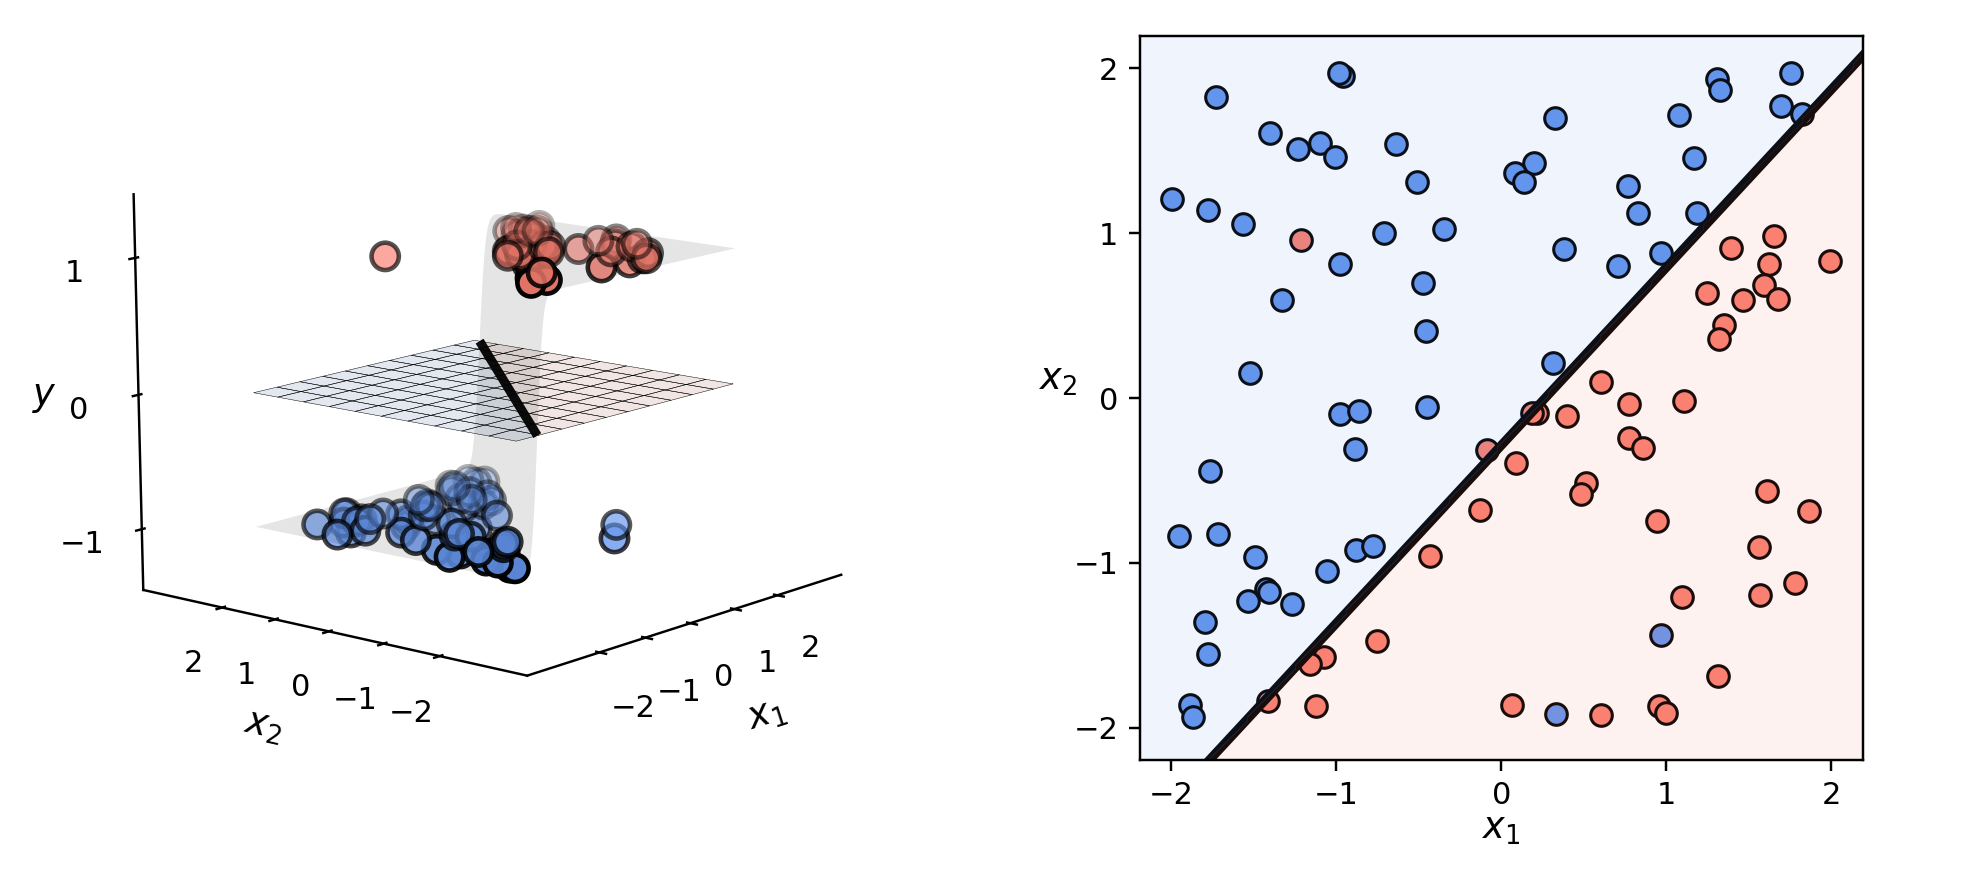

In [17]:
# create instance of 3d demos
demo5 = superlearn.classification_3d_demos.Visualizer(data)

# draw the final results
demo5.static_fig(w_hist,view = [15,-140])

## 1.2  The smooth softmax approximation to the relu perceptron cost

Learning and optimization go hand and hand, and as we know from the discussion above the relu function limits the number of optimization tools we can bring to bear for learning. It not prohibits the use of Newton's method but forces us to be very careful about how we choose our steplenth parameter $\alpha$ with gradient descent as well.  Here we describe a common approach to ameliorating this issue - the smooth approximation.  This practical idea takes many forms depending on the cost function at play, but the general idea is this: when dealing with a cost function that has some deficit (insofar as mathematical optimization is concerned) replace it with a  smooth (or at least twice differentiable) cost function that closely matches it everywhere.  If the approximation closely matches the true cost function than for the small amount of accuracy (we will after all be minimizing the approximation, not the true function itself) we significantly broaden the set of optimization tools we can use.

One popular way of doing this for the relu cost function is via the *softmax* function, which is a generic smooth approximation to the *max* function, that is the maximum of $N$ inputs $\text{max}\left(s_1,s_2,...,s_N\right)$.  The softmax is defined to as 

\begin{equation}
\text{soft}\left(s_1,s_2,...,s_N\right) = \text{log}\left(e^{s_1} + e^{s_2} + \cdots + e^{s_N} \right)
\end{equation}

and we have that 

\begin{equation}
\text{soft}\left(s_1,s_2,...,s_N\right) \approx \text{max}\left(s_1,s_2,...,s_N\right)
\end{equation}

To see why the softmax approximates the max function take the simple case when $N = 2$. 

Suppose momentarily that $s_{1}\leq s_{2}$, so that $\mbox{max}\left(s_{1},\,s_{2}\right)=s_{2}$.  Therefore $\mbox{max}\left(s_{1},\,s_{2}\right)$ can be written as $\mbox{max}\left(s_{1},\,s_{2}\right)=s_{1}+\left(s_{2}-s_{1}\right)$,
or equivalently as $\mbox{max}\left(s_{1},\,s_{2}\right)=\mbox{log}\left(e^{s_{1}}\right)+\mbox{log}\left(e^{s_{2}-s_{1}}\right)$ since $s=\mbox{log}\left(e^{s}\right)$ for any $s$. Written in this
way we can see that $\mbox{log}\left(e^{s_{1}}\right)+\mbox{log}\left(1+e^{s_{2} s_{1}}\right)=\mbox{log}\left(e^{s_{1}}+e^{s_{2}}\right)=\mbox{soft}\left(s_{1},s_{2}\right)$ is always larger than $\mbox{max}\left(s_{1},\,s_{2}\right)$ but not by much, especially when $e^{s_{2}-s_{1}}\gg1$. Since the same argument can be made if $s_{1}\geq s_{2}$ we can say generally that
$ $$\mbox{soft}\left(s_{1},s_{2}\right)\approx\mbox{max}\left(s_{1},s_{2}\right)$.  The more general case follows similarly as well.

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_4_2.png' width="40%" height="40%" alt=""/>
  <figcaption>   
<strong>Figure 2:</strong> <em> 
    Plots of the non-differentiable
perceptron or hinge cost $g\left(s\right)=\mbox{max}\left(0,\,s\right)$
(shown in green) as well as its smooth softmax approximation $g\left(s\right)=\mbox{soft}\left(0,\,s\right)=\mbox{log}\left(1+e^{s}\right)$
(shown in dashed black).}
    </em>  </figcaption> 
</figure>

Returning to the relu perceptron cost function in equation (5), notice what happens if we replace the $p^{tb}$ summand with its softmax approximation, we have

\begin{equation}
\text{soft}\left(0\,,\,-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}\right)= \text{log}\left(e^{0} + e^{-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}}\right) = \text{log}\left(1 + e^{-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}}\right).
\end{equation}

Doing this for all $P$ summands we have 

\begin{equation}
g\left(\mathbf{w}\right)=\underset{p=1}{\overset{P}{\sum}}\text{log}\left(1 + e^{-y_{p}^{\,}\mathbf{x}_{p}^{T}\mathbf{w}_{\,}^{\,}}\right)
\end{equation}

which is the *softmax cost* we saw previously derived from the logistic regression perspective on two-class classification.  This is why the cost is called *softmax*, since it derives from the general softmax approximation to the max function.

Note that *like* the relu cost - as we already know - the softmax cost is convex.  *Unlike* the relu cost, the softmax has infinitely many derivatives hence Newton's method can be used to minimize it.  Unlike the relu cost the softmax does not have a trivial solution at $\mathbf{w} = \mathbf{0}$ like the relu cost does.  However, as we have seen previously, the softmax cost can have a solution *at infinity* (when the data is perfectly separable) which can present its own numerical challenges.

Nonetheless, the fact that the softmax cost so closely approximates the relu shows just how closely aligned - in the end - both logistic regression and the perceptron truly are.  Practically speaking their differences lie in how well - for a particular dataset - one can optimize either one, along with (what is very often slight) differences in the quality of each cost function's learned decision boundary.

## 1.3  Predictions, misclassifications, and accuracy with the perceptron cost

Predictions, misclassifications, the computing of accuracy, etc., are all computed in the same manner described for logsitic regression.